In [1]:
import pandas as pd
import numpy as np
import datetime
import os

#Leer el archivo excel
File = pd.read_excel('Ec2019-2021-Oct- limpia.xlsx')
File

,eid,title,subtypeDescription,affilname,affiliation_country,author_names,coverDate,publicationName,aggregationType,description,authkeywords
0,2-s2.0-85124418743,Bases for an Introspective Reconstruction of E...,Article,Pontificia Universidad Catolica del Ecuador;Un...,Ecuador;Spain,"Mora Espejo, Dolores;Fuertes Grábalos, Enrique...",2021-12-31,America Latina Hoy,Journal,Latin American ecofeminism (ecofeminisms) need...,Ecofeminism(s) | Introspection | Perplexed vis...
1,2-s2.0-85123016303,Are There Opportunities for Sustainable Touris...,Article,Universidad Laica Eloy Alfaro de Manabí;Univer...,Ecuador;Spain,"Erick Rodolfo, Menéndez Delgado;Del Rosario, D...",2021-12-30,International Journal of Sustainable Developme...,Journal,"In recent years, tourism in Ecuador has increa...",Development | Manabí-Ecuador | Post COVID-19 |...
2,2-s2.0-85122149874,Nest description of Phyllotis andium (Cricetid...,Article,Consejo Nacional de Investigaciones Científica...,Argentina;Ecuador;Ecuador,"Nivelo-Villavicencio, Carlos;Quezada, Amanda B...",2021-12-30,Revista Peruana de Biologia,Journal,"In this work, we describe the structure of the...",Azuay | Cricetids | Grass | Pennisetum clandes...
3,2-s2.0-85122137710,Incidental consumption of plastic and other an...,Article,Universidad Mayor de San Andres Bolivia;Univer...,Bolivia;Ecuador;Brazil;Bolivia,"Richard, Enrique;Zapata, Denise Ilcen Contrera...",2021-12-30,Revista Peruana de Biologia,Journal,This study analyzes and discusses the ingestio...,Anthropocene | Bioaccumulation | Cathartidae |...
4,2-s2.0-85123459285,Structure-Function Relationships in the Human ...,Article,Universidad de las Americas - Ecuador;Jozef St...,Ecuador;Slovenia;Slovenia,"Mora Lagares, Liadys;Pérez-Castillo, Yunierkis...",2021-12-29,International journal of molecular sciences,Journal,P-Glycoprotein (P-gp) is a transmembrane prote...,ABC transporter | conformational changes | mol...
...,...,...,...,...,...,...,...,...,...,...,...
16193,2-s2.0-85044348777,Use of denosumab in osteogenesis imperfecta: A...,Article,Universidad Espíritu Santo;Universidad Catolic...,Ecuador;Ecuador;Ecuador,"Maldonado, Génessis;Ferro, Christian;Paredes, ...",2019-01-01,Revista Colombiana de Reumatologia,Journal,Osteogenesis imperfecta (OI) is an inherited d...,Denosumab | Fractures | Heterogeneity | Osteog...
16194,2-s2.0-85037640977,Theoretical study of the furfuryl benzoate and...,Article,Universidad San Francisco de Quito;Universidad...,Ecuador;Ecuador,"Mora, Jose R.;Rincón, Luis;Javier Torres, F.;Z...",2019-01-01,Journal of Physical Organic Chemistry,Journal,"In the present work, the pyrolysis reaction me...",density functional theory | natural bond orbit...
16195,2-s2.0-85032974666,Treatment challenges in and outside a speciali...,Article,Leibniz Institute for Prevention Research and ...,Germany;Malta;Iceland;United Kingdom;Norway;Fi...,"Lykoudis, Panagis M.;Partelli, Stefano;Muffatt...",2019-01-01,European Journal of Surgical Oncology,Journal,Pancreatic Neuroendocrine Neoplasms comprise a...,Liver metastases | Neuroendocrine tumours | Pa...
16196,2-s2.0-85030482966,Treatment challenges in and outside a network ...,Article,Leibniz Institute for Prevention Research and ...,Germany;Malta;Iceland;France;Italy;Norway;Finl...,"Pasquali, Sandro;Bonvalot, Sylvie;Tzanis, Dimi...",2019-01-01,European Journal of Surgical Oncology,Journal,Patients with soft tissue sarcoma (STS) experi...,Guidelines | Network | Referral centre | Sarco...


In [2]:
#selecciono las columnas coverDate y description
datos = pd.read_excel('Ec2019-2021-Oct- limpia.xlsx', usecols= ["coverDate", "description"])
datos

,coverDate,description
0,2021-12-31,Latin American ecofeminism (ecofeminisms) need...
1,2021-12-30,"In recent years, tourism in Ecuador has increa..."
2,2021-12-30,"In this work, we describe the structure of the..."
3,2021-12-30,This study analyzes and discusses the ingestio...
4,2021-12-29,P-Glycoprotein (P-gp) is a transmembrane prote...
...,...,...
16193,2019-01-01,Osteogenesis imperfecta (OI) is an inherited d...
16194,2019-01-01,"In the present work, the pyrolysis reaction me..."
16195,2019-01-01,Pancreatic Neuroendocrine Neoplasms comprise a...
16196,2019-01-01,Patients with soft tissue sarcoma (STS) experi...


In [3]:
# exporto los datos de las dos columnas en formato csv y leo el archivo csv
datos.to_csv("dataset20.csv")
data = pd.read_csv('dataset20.csv')
data.head(10)

,Unnamed: 0,coverDate,description
0,0,2021-12-31,Latin American ecofeminism (ecofeminisms) need...
1,1,2021-12-30,"In recent years, tourism in Ecuador has increa..."
2,2,2021-12-30,"In this work, we describe the structure of the..."
3,3,2021-12-30,This study analyzes and discusses the ingestio...
4,4,2021-12-29,P-Glycoprotein (P-gp) is a transmembrane prote...
5,5,2021-12-28,"Cueva Huenul 1 site, located in the extreme no..."
6,6,2021-12-27,We describe a new species of terrestrial-breed...
7,7,2021-12-24,A search for long-lived particles (LLPs) produ...
8,8,2021-12-24,Background: The emerging field of artificial i...
9,9,2021-12-23,Introduction: The airway microbiota has been l...


In [4]:
#obtengo datos de las columnas para poder transformar la columna coverDate en solo año
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16198 entries, 0 to 16197
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16198 non-null  int64 
 1   coverDate    16198 non-null  object
 2   description  16198 non-null  object
dtypes: int64(1), object(2)
memory usage: 379.8+ KB


In [5]:
# convierto la columna coverDate de objeto a datetime
data["coverDate"] = pd.to_datetime(data["coverDate"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16198 entries, 0 to 16197
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   16198 non-null  int64         
 1   coverDate    16198 non-null  datetime64[ns]
 2   description  16198 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 379.8+ KB


In [6]:
# dejamos solo en año en la columna coverDate para poder aplicar filtro
data['coverDate'] = pd.DatetimeIndex(data['coverDate']).year
data

,Unnamed: 0,coverDate,description
0,0,2021,Latin American ecofeminism (ecofeminisms) need...
1,1,2021,"In recent years, tourism in Ecuador has increa..."
2,2,2021,"In this work, we describe the structure of the..."
3,3,2021,This study analyzes and discusses the ingestio...
4,4,2021,P-Glycoprotein (P-gp) is a transmembrane prote...
...,...,...,...
16193,16193,2019,Osteogenesis imperfecta (OI) is an inherited d...
16194,16194,2019,"In the present work, the pyrolysis reaction me..."
16195,16195,2019,Pancreatic Neuroendocrine Neoplasms comprise a...
16196,16196,2019,Patients with soft tissue sarcoma (STS) experi...


In [7]:
#Filtramos y exportamos la data del año 2020
data2020 = data[data['coverDate'] == 2020]
data2020.to_csv("dataset2020.csv")
data2020.head(10)

,Unnamed: 0,coverDate,description
5788,5788,2020,Background: Hypertension requires life-long me...
5789,5789,2020,Damage control resuscitation should be initiat...
5790,5790,2020,Hemorrhagic shock and its complications are a ...
5791,5791,2020,The liver is the most commonly affected solid ...
5792,5792,2020,Purpose: Banks are institutions that inject mo...
5793,5793,2020,We report a highly efficient system for CO2 ca...
5794,5794,2020,The huge amount of textual information that ex...
5795,5795,2020,"Maxillaria purpureo-nigra Zambrano, Carnevali ..."
5796,5796,2020,Temperate rocky reefs in Atlantic Patagonia ar...
5797,5797,2020,Gastrointestinal tract (GIT) responses to a hi...


In [8]:
#Filtramos y exportamos la data del año 2020
data2020 = data[data['coverDate'] == 2020]
data2020.to_csv("dataset2020.csv")
data2020.head(10)

,Unnamed: 0,coverDate,description
5788,5788,2020,Background: Hypertension requires life-long me...
5789,5789,2020,Damage control resuscitation should be initiat...
5790,5790,2020,Hemorrhagic shock and its complications are a ...
5791,5791,2020,The liver is the most commonly affected solid ...
5792,5792,2020,Purpose: Banks are institutions that inject mo...
5793,5793,2020,We report a highly efficient system for CO2 ca...
5794,5794,2020,The huge amount of textual information that ex...
5795,5795,2020,"Maxillaria purpureo-nigra Zambrano, Carnevali ..."
5796,5796,2020,Temperate rocky reefs in Atlantic Patagonia ar...
5797,5797,2020,Gastrointestinal tract (GIT) responses to a hi...


In [9]:
#Experimento Información 2020 con una muestra de 100 elementos
data2020 = pd.read_csv("dataset2020.csv").sample(80)
data2020.head()

,Unnamed: 0.1,Unnamed: 0,coverDate,description
4734,10522,10522,2020,The defense industry must be at the forefront ...
672,6460,6460,2020,"In 2020, GEANT the advanced network for Europe..."
1224,7012,7012,2020,The synthesis of a power distribution architec...
494,6282,6282,2020,Mimetic systems allow us to address the questi...
4954,10742,10742,2020,This work shows the development and implementa...


In [10]:
# Cargamos la libreria RE
import re

# Removemos la puntuación
data2020['description_processed'] = \
data2020['description'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
data2020['description_processed'] = \
data2020['description_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
data2020['description_processed'].head()

4734    the defense industry must be at the forefront ...
672     in 2020 geant the advanced network for europe ...
1224    the synthesis of a power distribution architec...
494     mimetic systems allow us to address the questi...
4954    this work shows the development and implementa...
Name: description_processed, dtype: object

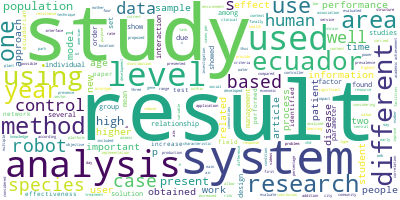

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data2020['description_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [12]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data20 = data2020.description_processed.values.tolist()
data_words = list(sent_to_words(data20))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['defense', 'industry', 'must', 'forefront', 'technology', 'innovation', 'order', 'accomplish', 'mission', 'isolated', 'research', 'system', 'suffers', 'limitations', 'human', 'capital', 'specialized', 'resources', 'facilities', 'alternative', 'improve', 'defense', 'innovation', 'system', 'establishment', 'cooperation', 'agreements', 'universities', 'however', 'university']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [14]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"analysis" + 0.006*"information" + 0.005*"results" + '
  '0.005*"achievement" + 0.005*"academic" + 0.004*"set" + 0.004*"using" + '
  '0.004*"group" + 0.003*"class" + 0.003*"different"'),
 (1,
  '0.006*"species" + 0.005*"rs" + 0.005*"study" + 0.005*"results" + '
  '0.004*"ecuador" + 0.003*"high" + 0.003*"analysis" + 0.003*"sector" + '
  '0.003*"compared" + 0.002*"economic"'),
 (2,
  '0.006*"results" + 0.006*"analysis" + 0.004*"system" + 0.004*"ecuador" + '
  '0.004*"using" + 0.004*"per" + 0.003*"disease" + 0.003*"cases" + '
  '0.003*"different" + 0.003*"ecu"'),
 (3,
  '0.005*"web" + 0.004*"research" + 0.004*"study" + 0.004*"nc" + 0.004*"used" '
  '+ 0.003*"multimedia" + 0.003*"results" + 0.003*"level" + 0.003*"also" + '
  '0.003*"parking"'),
 (4,
  '0.005*"well" + 0.005*"results" + 0.005*"study" + 0.004*"resistance" + '
  '0.004*"ecuador" + 0.003*"analysis" + 0.003*"one" + 0.003*"system" + '
  '0.003*"chd" + 0.003*"population"'),
 (5,
  '0.004*"data" + 0.004*"analysis" + 0

In [15]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results20/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results20/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.041922 -0.007657       1        1  20.294850
9      0.010290 -0.078918       2        1  13.136693
4     -0.035897 -0.002078       3        1  10.793172
6      0.032601 -0.001895       4        1  10.318204
3      0.045430  0.048014       5        1   9.801064
8     -0.057377  0.041941       6        1   9.544033
1     -0.025634 -0.005190       7        1   9.449181
0      0.051725  0.019382       8        1   7.374345
7      0.018828 -0.024034       9        1   6.658660
5      0.001956  0.010435      10        1   2.629798, topic_info=             Term      Freq      Total Category  logprob  loglift
1507           rs  9.000000   9.000000  Default  30.0000  30.0000
2182      forests  7.000000   7.000000  Default  29.0000  29.0000
3250  achievement  8.000000   8.000000  Default  28.0000  28.0000
2051          web  8.000000   8.000000  Default  27.0000  27.0000
1109         park  6.000000   6.000000  Default  26.0000  26.0000
...           ...       ...        ...      ...      ...      ...
9            case  0.458006  11.630192  Topic10  -6.2250   0.4038
197          also  0.472934  15.060230  Topic10  -6.1929   0.1774
136         based  0.474955  16.332842  Topic10  -6.1887   0.1006
130         using  0.441116  24.668909  Topic10  -6.2626  -0.3857
212     different  0.429099  24.793227  Topic10  -6.2902  -0.4184

[690 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2764      1  0.093708   academic
2764      2  0.093708   academic
2764      3  0.093708   academic
2764      4  0.093708   academic
2764      5  0.187416   academic
...     ...       ...        ...
557       7  0.061585      years
557       8  0.061585      years
557       9  0.061585      years
559       1  0.354644  youtubers
559       4  0.354644  youtubers

[1460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 5, 7, 4, 9, 2, 1, 8, 6])